In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [1]:
#1-1
house = pd.read_csv('BostonHousing.csv')
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,5.33,36.2


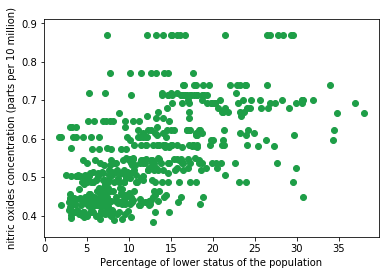

In [6]:
plt.scatter(house['LSTAT'], house['NOX'], c='#1E9E47')
plt.ylabel('nitric oxides concentration (parts per 10 million)')
plt.xlabel('Percentage of lower status of the population')

plt.show()

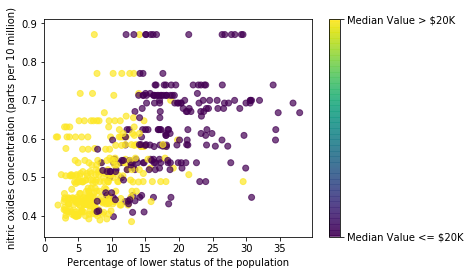

In [9]:
house.loc[house['MEDV'] > 20, 'MEDR'] = 1
house.loc[house['MEDV'] <= 20, 'MEDR'] = 0

plt.scatter(house['LSTAT'], house['NOX'], c=house['MEDR'],alpha=0.7)
plt.ylabel('nitric oxides concentration (parts per 10 million)')
plt.xlabel('Percentage of lower status of the population')

cbar = plt.colorbar(ticks=[0, 1])
cbar.set_ticklabels(['Median Value <= $20K', 'Median Value > $20K'])

plt.show()

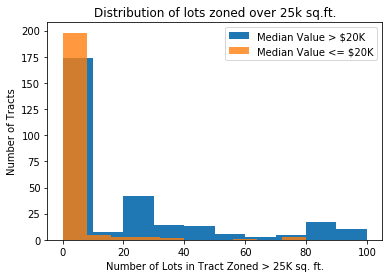

In [15]:
high = house.loc[house['MEDR'] == 1, 'ZN']
low = house.loc[house['MEDR'] == 0, 'ZN']

plt.hist(high,10)
plt.hist(low,10,alpha=0.8)
plt.ylabel('Number of Tracts')
plt.xlabel('Number of Lots in Tract Zoned > 25K sq. ft.')
plt.legend(['Median Value > $20K','Median Value <= $20K'])
plt.title('Distribution of lots zoned over 25k sq.ft.')
plt.show()

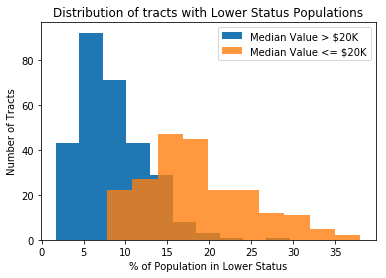

In [13]:
high = house.loc[house['MEDR'] == 1, 'LSTAT']
low = house.loc[house['MEDR'] == 0, 'LSTAT']

plt.hist(high,10)
plt.hist(low,10,alpha=0.8)
plt.xlabel('% of Population in Lower Status')
plt.ylabel('Number of Tracts')
plt.legend(['Median Value > $20K','Median Value <= $20K'])
plt.title('Distribution of tracts with Lower Status Populations')
plt.show()

In [19]:
np.corrcoef(house['MEDR'],house['LSTAT'])[1,0]

-0.7019681893089625

In [20]:
np.corrcoef(house['MEDR'],house['ZN'])[1,0]

0.32184649736221177

In [21]:
house[house['MEDR'] == 1].count()

CRIM       291
ZN         291
INDUS      291
CHAS       291
NOX        291
RM         291
AGE        291
DIS        291
RAD        291
PTRATIO    291
LSTAT      291
MEDV       291
MEDR       291
dtype: int64

In [22]:
house[house['CHAS'] == 1].count()

CRIM       35
ZN         35
INDUS      35
CHAS       35
NOX        35
RM         35
AGE        35
DIS        35
RAD        35
PTRATIO    35
LSTAT      35
MEDV       35
MEDR       35
dtype: int64

In [26]:
charles = house[house['CHAS'] == 1]
charles.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,LSTAT,MEDV,MEDR
142,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,14.7,26.82,13.4,0.0
152,1.12658,0.0,19.58,1,0.871,5.012,88.0,1.6102,5,14.7,12.12,15.3,0.0
154,1.41385,0.0,19.58,1,0.871,6.129,96.0,1.7494,5,14.7,15.12,17.0,0.0
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,14.7,15.02,15.6,0.0
160,1.27346,0.0,19.58,1,0.605,6.250,92.6,1.7984,5,14.7,5.50,27.0,1.0


In [24]:
np.mean(charles['PTRATIO'])

17.491428571428575

In [27]:
#2.1
ship = pd.read_csv('ApplianceShipments.csv')
ship.head()

,Year,Quarter,Shipments
0,1985,1,4009
1,1985,2,4321
2,1985,3,4224
3,1985,4,3944
4,1986,1,4123


In [29]:
eightyfive = ship[ship['Year'] == 1985]
eightyfive.head()

,Year,Quarter,Shipments
0,1985,1,4009
1,1985,2,4321
2,1985,3,4224
3,1985,4,3944


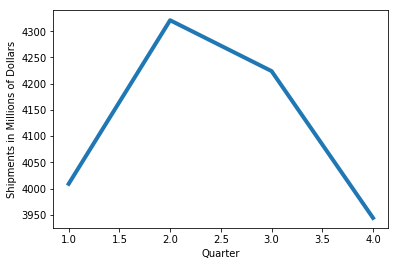

In [32]:
x = eightyfive['Quarter']
y = eightyfive['Shipments']
plt.xlabel('Quarter')
plt.ylabel('Shipments in Millions of Dollars')
plt.plot(x,y,linewidth = 4)
plt.show()

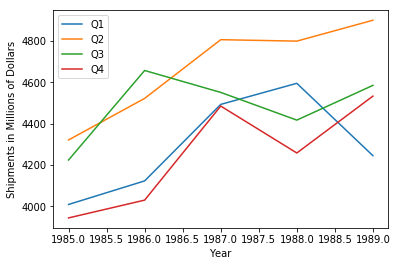

In [41]:
q1 = ship[ship['Quarter'] == 1]
q2 = ship[ship['Quarter'] == 2]
q3 = ship[ship['Quarter'] == 3]
q4 = ship[ship['Quarter'] == 4]

q1x = q1['Year']
q2x = q2['Year']
q3x = q3['Year']
q4x = q4['Year']

q1y = q1['Shipments']
q2y = q2['Shipments']
q3y = q3['Shipments']
q4y = q4['Shipments']

plt.plot(q1x,q1y,label='Q1')
plt.plot(q2x,q2y,label='Q2')
plt.plot(q3x,q3y,label='Q3')
plt.plot(q4x,q4y,label='Q4')

plt.xlabel('Year')
plt.ylabel('Shipments in Millions of Dollars')
plt.legend()
plt.show()

In [93]:
select_index = ['Year','Shipments']
indexed = ship.loc[:,select_index]
indexed.head()

,Year,Shipments
0,1985,4009
1,1985,4321
2,1985,4224
3,1985,3944
4,1986,4123


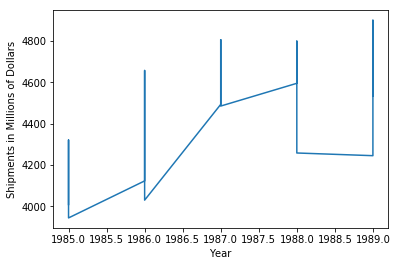

In [94]:
plt.plot(indexed['Year'],indexed['Shipments'])
plt.xlabel('Year')
plt.ylabel('Shipments in Millions of Dollars')
plt.show()

In [61]:
# 3-1
toyota = pd.read_csv('ToyotaCorolla.csv')
toyota.head()

,Price,Age,KM,HP,Met_Color,Automatic,Doors,Weight
0,13500,23,46986,90,1,0,3,1165
1,13750,23,72937,90,1,0,3,1165
2,13950,24,41711,90,1,0,3,1165
3,14950,26,48000,90,0,0,3,1165
4,13750,30,38500,90,0,0,3,1170


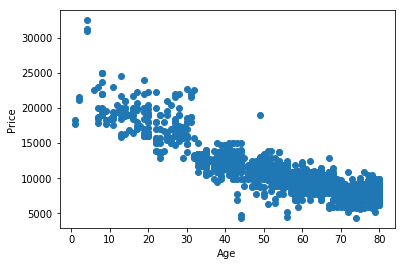

In [62]:
plt.scatter(toyota['Age'], toyota['Price'])
plt.ylabel('Price')
plt.xlabel('Age')

plt.show()

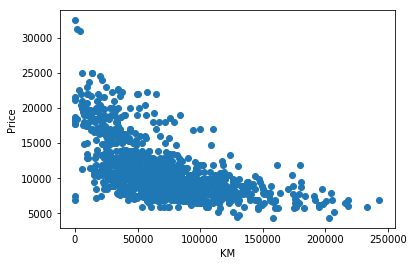

In [64]:
plt.scatter(toyota['KM'], toyota['Price'])
plt.ylabel('Price')
plt.xlabel('KM')

plt.show()

In [70]:
#predictors
select_index = ['Age','KM']
toyota_X = toyota.loc[:,select_index]
#target
toyota_y = toyota.loc[:,'Price']
# split data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(toyota_X, toyota_y, test_size=0.2, random_state=77)
#initiate model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#train model using training set
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
#coefficients, in order of input arguments
model.coef_

array([-1.5469579e+02, -1.5435661e-02])

In [72]:
# beta-0
model.intercept_

20440.350899754118

In [76]:
test = [[48,41636]]
model.predict(test)

array([12372.27382206])

In [77]:
#make predictions on validation data; any 2-D array matching training data will would work
y_pred = model.predict(X_valid)
import numpy as np
#find mean avaerage error
e = y_valid - y_pred
mae = np.mean(np.abs(e))
print(mae)

1188.577016600191


In [78]:
#compare to mae of training data
y_pred_train = model.predict(X_train)
e = y_train - y_pred_train
mae = np.mean(np.abs(e))
print(mae)

1180.9359879662018


In [79]:
#4-1
air = pd.read_csv('Airfares.csv')
air.head()

,COUPON,NEW,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
0,1.00,3,1,5291.99,28637,21112,3036732,205711,312,7864,64.11
1,1.06,3,0,5419.16,26993,29838,3532657,7145897,576,8820,174.47
2,1.06,3,0,9185.28,30124,29838,5787293,7145897,364,6452,207.76
3,1.06,3,1,2657.35,29260,29838,7830332,7145897,612,25144,85.47
4,1.06,3,1,2657.35,29260,29838,7830332,7145897,612,25144,85.47


In [80]:
#predictors
select_index = ['COUPON','NEW','SW','HI','S_INCOME','E_INCOME','S_POP','E_POP','DISTANCE','PAX']
air_X = air.loc[:,select_index]
#target
air_y = air.loc[:,'FARE']
# split data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(air_X, air_y, test_size=0.3, random_state=22)
#initiate model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#train model using training set
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
model.coef_

array([ 9.30882400e+00, -6.51090772e-01, -4.29637935e+01,  8.50287034e-03,
        2.59885570e-03,  2.32248587e-03,  6.42875820e-06,  7.90558731e-06,
        6.62762580e-02, -1.24866956e-03])

In [83]:
test2 = [[1.202,3,0,4442.141,28760,27664,4557004,3195503,12782,1976]]
before = model.predict(test2)

In [84]:
test3 = [[1.202,3,1,4442.141,28760,27664,4557004,3195503,12782,1976]]
after = model.predict(test3)
print(before-after)

[42.96379355]


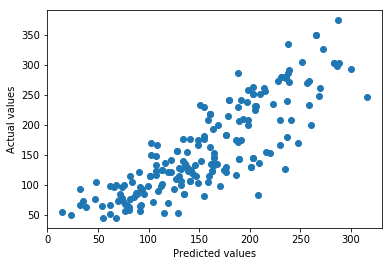

In [85]:
x = model.predict(X_valid)
y = y_valid
plt.scatter(x, y)
plt.ylabel('Actual values')
plt.xlabel('Predicted values')

plt.show()

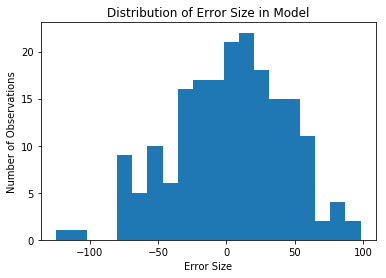

In [88]:
e = y_valid - x

plt.hist(e,20)
plt.ylabel('Number of Observations')
plt.xlabel('Error Size')
plt.title('Distribution of Error Size in Model')
plt.show()